<a href="https://colab.research.google.com/github/akivig1601/Website-Phishing-Detection/blob/main/phishing_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
!pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# Fetch the Phishing Websites dataset (UCI ID: 327)
phishing_websites = fetch_ucirepo(id=327)

# Extract features and target
X = phishing_websites.data.features
y = phishing_websites.data.targets

# Optional: Check metadata
print(phishing_websites.metadata)

# Optional: Check variable types/info
print(phishing_websites.variables)

# View data
X.head()
y.head()

{'uci_id': 327, 'name': 'Phishing Websites', 'repository_url': 'https://archive.ics.uci.edu/dataset/327/phishing+websites', 'data_url': 'https://archive.ics.uci.edu/static/public/327/data.csv', 'abstract': 'This dataset collected mainly from: PhishTank archive, MillerSmiles archive, Googleâ€™s searching operators.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 11055, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['result'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Tue Mar 05 2024', 'dataset_doi': '10.24432/C51W2X', 'creators': ['Rami Mohammad', 'Lee McCluskey'], 'intro_paper': {'ID': 396, 'type': 'NATIVE', 'title': 'An assessment of features related to phishing websites using an automated technique', 'authors': 'R. Mohammad, F. Thabtah, L. Mccluskey', 'venue': 'International Conference for Internet Tec

,result
0,-1
1,-1
2,-1
3,-1
4,1


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train.values.ravel())  # Flatten target column if needed
rf_preds = rf.predict(X_test)

✅ Accuracy: 96.79%

📄 Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



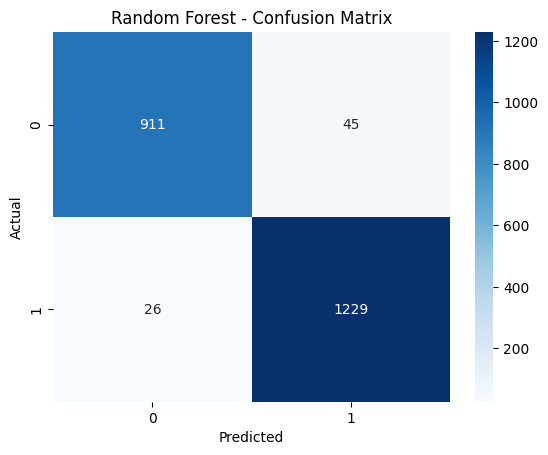

In [7]:
accuracy = accuracy_score(y_test, rf_preds)
print(f"✅ Accuracy: {accuracy * 100:.2f}%")
print("\n📄 Classification Report:\n", classification_report(y_test, rf_preds))

# Confusion matrix
cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()